In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
churn_data = pd.read_csv("/content/Bank Customer Churn Prediction.csv")
display(churn_data.head())
display(churn_data.tail())
display(churn_data.info())
display(churn_data.describe())


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


None

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [18]:
churn={'customer_id':str,
       'credit_score':int,
       'country':str,
       'gender':str,
       'age': int,
       'tenure':int,
       'balance': float,
       'products_number':int,
       'credit_card':bool,
       'active_member':bool,
       'estimated_salary':float,
       'churn':bool
       }
churn_data = churn_data.astype(churn)
display(churn_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  object 
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  bool   
 9   active_member     10000 non-null  bool   
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  bool   
dtypes: bool(3), float64(2), int64(4), object(3)
memory usage: 732.5+ KB


None

In [49]:
display(churn_data.head())
display(churn_data.tail())


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,True,True,101348.88,True
1,15647311,608,Spain,Female,41,1,83807.86,1,False,True,112542.58,False
2,15619304,502,France,Female,42,8,159660.80,3,True,False,113931.57,True
3,15701354,699,France,Female,39,1,0.00,2,False,False,93826.63,False
4,15737888,850,Spain,Female,43,2,125510.82,1,True,True,79084.10,False


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9995,15606229,771,France,Male,39,5,0.00,2,True,False,96270.64,False
9996,15569892,516,France,Male,35,10,57369.61,1,True,True,101699.77,False
9997,15584532,709,France,Female,36,7,0.00,1,False,True,42085.58,True
9998,15682355,772,Germany,Male,42,3,75075.31,2,True,False,92888.52,True
9999,15628319,792,France,Female,28,4,130142.79,1,True,False,38190.78,False


In [50]:
display(churn_data.describe())

,credit_score,age,tenure,balance,products_number,estimated_salary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


In [42]:
churn_by_country=pd.crosstab(churn_data.churn,churn_data.country)
churn_by_country.style.background_gradient()

country,France,Germany,Spain
churn,,,
False,4204,1695,2064
True,810,814,413


In [43]:
churn_by_gender=pd.crosstab(churn_data.churn,churn_data.gender)
churn_by_gender.style.background_gradient()

gender,Female,Male
churn,,
False,3404,4559
True,1139,898


In [44]:
churn_by_creditcard=pd.crosstab(churn_data.churn,churn_data.credit_card)
churn_by_creditcard.style.background_gradient()

credit_card,False,True
churn,,
False,2332,5631
True,613,1424


In [45]:
churn_by_activemember=pd.crosstab(churn_data.churn,churn_data.active_member)
churn_by_activemember.style.background_gradient()

active_member,False,True
churn,,
False,3547,4416
True,1302,735


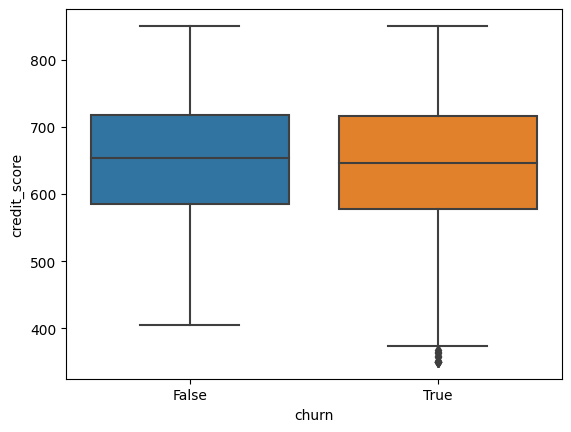

In [34]:
churn_by_creditscore=sns.boxplot(data=churn_data,x='churn',y='credit_score')

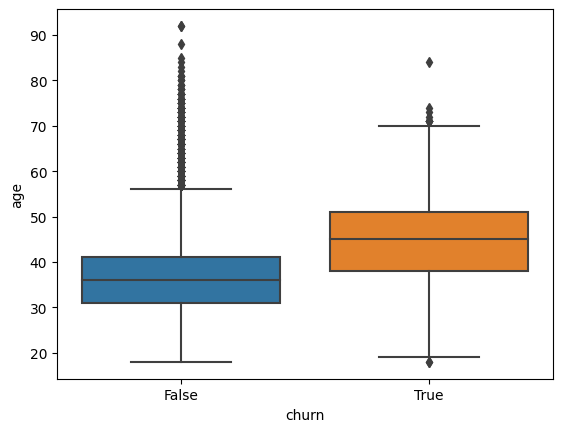

In [35]:
churn_by_age=sns.boxplot(data=churn_data,x='churn',y='age')

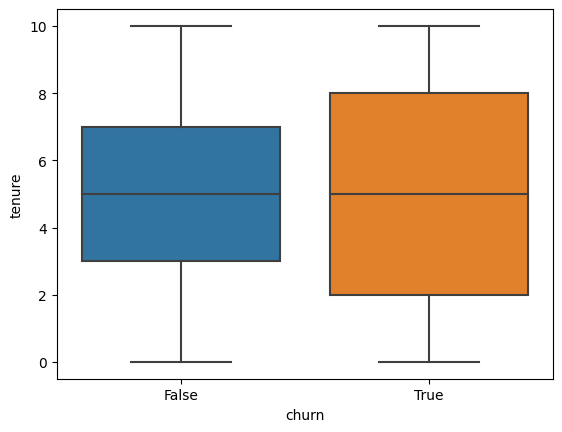

In [36]:
churn_by_tenure=sns.boxplot(data=churn_data,x='churn',y='tenure')

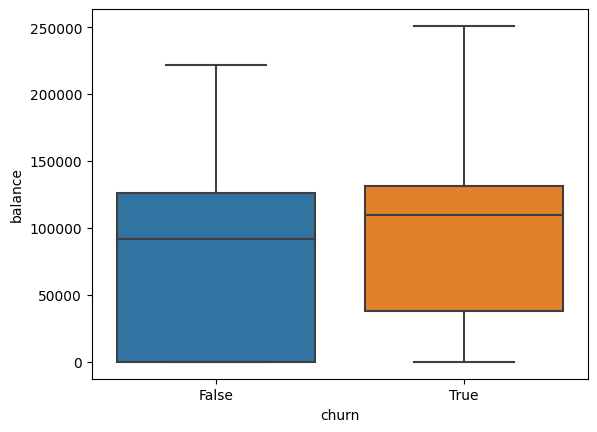

In [37]:
churn_by_balance=sns.boxplot(data=churn_data,x='churn',y='balance')

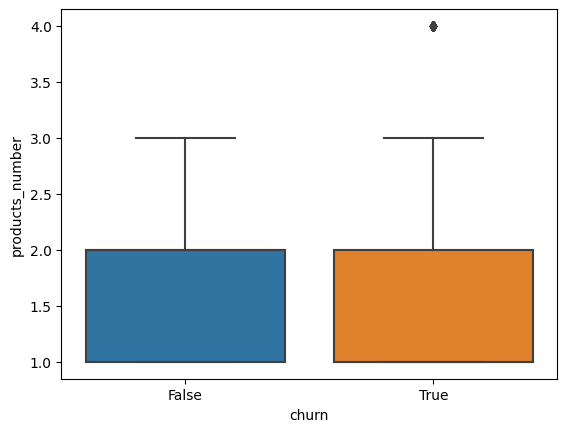

In [38]:
churn_by_products=sns.boxplot(data=churn_data,x='churn',y='products_number')

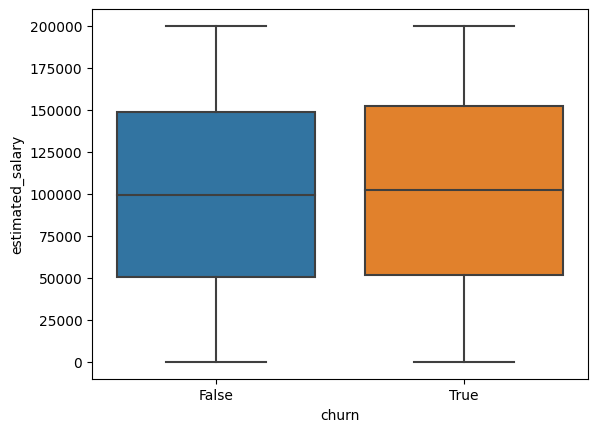

In [39]:
churn_by_salary=sns.boxplot(data=churn_data,x='churn',y='estimated_salary')

Text(0.5, 1.0, 'churn by balance and country')

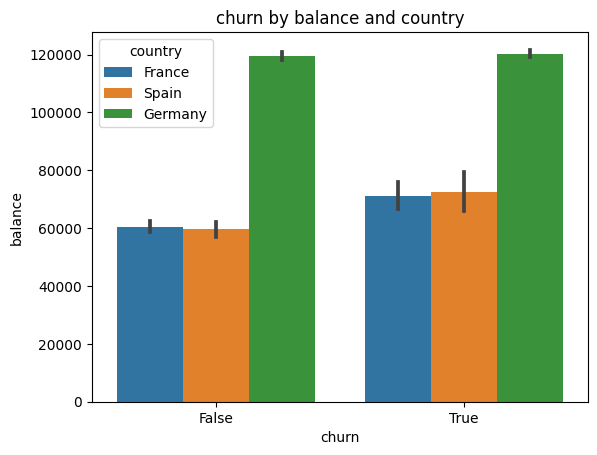

In [46]:
churn_by_balance_and_country=sns.barplot(data=churn_data,x='churn',y='balance',hue='country')
churn_by_balance_and_country.set_title('churn by balance and country')

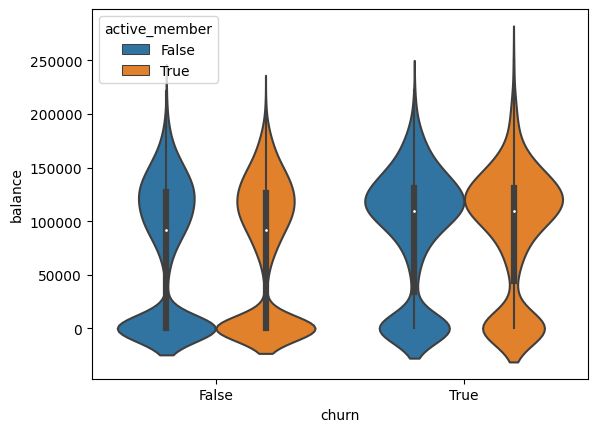

In [48]:
churn_by_activemember_and_balance=sns.violinplot(data=churn_data,x='churn',y='balance',hue='active_member')

<ipython-input-52-a4a23e9af9f3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = churn_data.corr()
<ipython-input-52-a4a23e9af9f3>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(churn_data.corr(),cmap="YlGnBu",linewidths=0.5,annot=True,annot_kws={"size":6.5},mask=mask)


<Axes: >

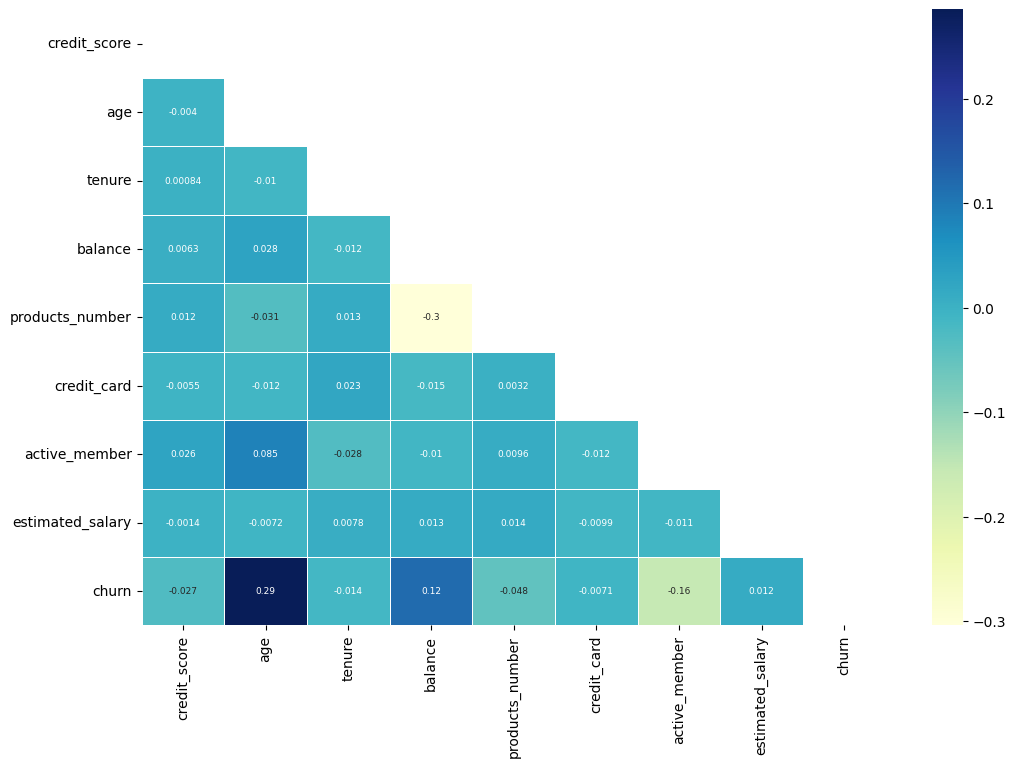

In [52]:
plt.figure(figsize=(12,8))
corr = churn_data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(churn_data.corr(),cmap="YlGnBu",linewidths=0.5,annot=True,annot_kws={"size":6.5},mask=mask)